## Numerical Methods for Solving ODE
### dy / dx = cos(2x) 
### y0 = 2.0
### x = from 0 to 2 pi

In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
# Initial value
f = lambda x, y : np.cos(2*x)

# Calculating exact value 
exact = lambda x : 2 + np.sin(2*x) / 2

# First value of y
y0 = 2.0

In [183]:
# Euler method
def euler(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    dx = x[1] - x[0]
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i] + dx * f(x[i], y[i])
    return y

# Calculating error
def errEuler(f, x, y0):
    return np.linalg.norm(euler(f, x, y0) - exact(x)) / np.linalg.norm(exact(x)) * 100

In [197]:
# Midpoint method
def midpoint(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    dx = x[1] - x[0]
    y[0] = y0
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + dx, y[i] + k1 * dx)
        y[i+1] = y[i] + dx * (k1 + k2)/2
    return y

# Calculating error
def errMid(f, x, y0):
    return np.linalg.norm(midpoint(f, x, y0) - exact(x)) / np.linalg.norm(exact(x)) * 100

In [186]:
# Ralston method
def ralston(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    dx = x[1] - x[0]
    y[0] = y0
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + (3 / 4 * dx), y[i] + (3 / 4 * k1 * dx))
        y[i+1] = y[i] + dx * ((1 / 3 * k1) + (2 / 3 * k2))
    return y

# Calculating error
def errRals(f, x, y0):
    return np.linalg.norm(ralston(f, x, y0) - exact(x)) / np.linalg.norm(exact(x)) * 100

In [187]:
# Runge-Kutta 4th order method
def rungeKutta(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    dx = x[1] - x[0]
    y[0] = y0
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + (1 / 2 * dx), y[i] + (1 / 2 * k1 * dx))
        k3 = f(x[i] + (1 / 2 * dx), y[i] + (1 / 2 * k2 * dx))
        k4 = f(x[i] + dx, y[i] + k3 * dx)
        y[i+1] = y[i] + dx * 1 / 6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Calculating error
def errRunge(f, x, y0):
    return np.linalg.norm(rungeKutta(f, x, y0) - exact(x)) / np.linalg.norm(exact(x)) * 100

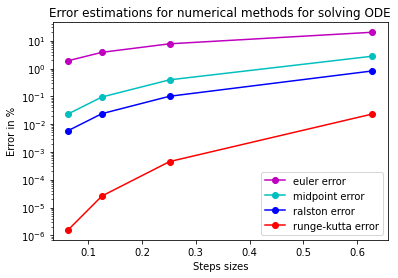

In [203]:
# Steps and total from the question
steps = np.array([np.pi * 2 / 100, np.pi * 2 / 50, np.pi * 2 / 25, np.pi * 2 / 10])
total = np.array([100, 50, 25, 10])

# Arrays to store all data of each methods
dataEuler = np.array([])
dataMid = np.array([])
dataRals = np.array([])
dataRunge = np.array([])

# Looping through all steps and total, apply to each methods
for i in range(4):
    x = np.linspace(0, 2 * np.pi, total[i])
    dataEuler = np.append(dataEuler, [errEuler(f, x, y0)])
    dataMid = np.append(dataMid, [errMid(f, x, y0)])
    dataRals = np.append(dataRals, [errRals(f, x, y0)])
    dataRunge = np.append(dataRunge, [errRunge(f, x, y0)])
    
# Plotting the graph
plt.plot(step, dataEuler,"-mo", label="euler error")
plt.plot(step, dataMid,"-co", label="midpoint error")
plt.plot(step, dataRals,"-bo", label="ralston error")
plt.plot(step, dataRunge,"-ro", label="runge-kutta error")
    
plt.yscale("log")
plt.title("Error estimations for numerical methods for solving ODE")
plt.xlabel("Steps sizes")
plt.ylabel("Error in %")
    
plt.legend()